In [1]:
import pandas as pd
import numpy as np
import math
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

## Data Selection and Preprocessing:

In [2]:
#All 408 Symbol Names
Symb=['MMM', 'ABT', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES',
       'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN',
       'LNT', 'ALL', 'GOOGL', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP',
       'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI',
       'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'ADM', 'AJG',
       'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BLL',
       'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG',
       'BWA', 'BXP', 'BSX', 'BMY', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS',
       'CPB', 'CAH', 'KMX', 'CCL', 'CAT', 'CBRE', 'CE', 'CNC', 'CNP',
       'CERN', 'CF', 'SCHW', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF',
       'CTAS', 'CSCO', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL',
       'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST',
       'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE',
       'DAL', 'XRAY', 'DVN', 'DXCM', 'DLR', 'DISCA', 'DISCK', 'DISH',
       'DLTR', 'D', 'DPZ', 'DOV', 'DTE', 'DUK', 'DRE', 'EMN', 'ETN',
       'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX',
       'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'RE', 'EXC', 'EXPE', 'EXPD',
       'EXR', 'XOM', 'FFIV', 'FAST', 'FRT', 'FDX', 'FIS', 'FE', 'FISV',
       'FLIR', 'FMC', 'F', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE',
       'GIS', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI',
       'HIG', 'HAS', 'PEAK', 'HSIC', 'HSY', 'HES', 'HFC', 'HOLX', 'HD',
       'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'IEX', 'IDXX', 'ITW', 'ILMN',
       'INCY', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG',
       'IVZ', 'IPGP', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI',
       'JNPR', 'KSU', 'K', 'KMB', 'KIM', 'KLAC', 'KR', 'LB', 'LH', 'LRCX',
       'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ',
       'LMT', 'L', 'LOW', 'MRO', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA',
       'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM',
       'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO',
       'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM',
       'NEE', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NOV', 'NRG',
       'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL',
       'PCAR', 'PKG', 'PH', 'PAYX', 'PNR', 'PEP', 'PKI', 'PRGO', 'PFE',
       'PM', 'PNW', 'PXD', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR',
       'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'PWR', 'QCOM', 'DGX',
       'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RSG', 'RMD', 'RHI', 'ROK',
       'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE',
       'SRE', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX',
       'STE', 'SYK', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT',
       'TEL', 'TDY', 'TFX', 'TER', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO',
       'TDG', 'TRV', 'TRMB', 'TYL', 'TSN', 'UDR', 'ULTA', 'UAA', 'UNP',
       'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN',
       'VZ', 'VRTX', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT',
       'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WELL', 'WST', 'WDC', 'WU', 'WY',
       'WHR', 'WMB', 'WYNN', 'XEL', 'XLNX', 'YUM', 'ZBRA', 'ZBH']

In [3]:
len(Symb)

408

In [4]:
stocks={}
for s in Symb:
    stocks[s]=pd.read_csv("stocks408/"+str(s)+".csv",index_col=0)
#stocks[str(Symb[0])]
stocks['MMM']

,Industrials,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,...,Return,Net Margin,Total Asset turnover,Return on Equity,DCF Prem,PE Prem,Price,Growth,PB,PE
2015-02-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013062,0.312194,0.345665,0.355331,-0.057713,0.182330,0.539528,0.008996,-0.016023,-0.144624
2015-02-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009245,0.312194,0.345665,0.355331,-0.057713,0.182330,0.539528,0.008996,-0.016023,-0.144624
2015-02-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006810,0.312194,0.345665,0.355331,-0.057713,0.182330,0.539528,0.008996,-0.016023,-0.144624
2015-02-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010558,0.312194,0.345665,0.355331,-0.057713,0.182330,0.539528,0.008996,-0.016023,-0.144624
2015-02-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002882,0.312194,0.345665,0.355331,-0.057713,0.182330,0.539528,0.008996,-0.016023,-0.144624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003046,0.020245,-0.084345,0.123532,-0.051475,0.052958,0.155769,0.008996,-0.007265,-0.337670
2020-12-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001089,0.019475,-0.089099,0.123532,-0.051475,0.052958,0.155769,0.008996,-0.007265,-0.337670
2020-12-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004922,0.019475,-0.089099,0.123532,-0.051475,0.052958,0.155769,0.008996,-0.007265,-0.337670
2020-12-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001495,0.019475,-0.089099,0.123532,-0.051475,0.052958,0.155769,0.008996,-0.007265,-0.337670


In [5]:
f=stocks['MMM'].columns.values
f

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy', 'MR', 'MOM', 'Return', 'Net Margin',
       'Total Asset turnover', 'Return on Equity', 'DCF Prem', 'PE Prem',
       'Price', 'Growth', 'PB', 'PE'], dtype=object)

In [6]:
factors={}
for f_ in f:
    factors[f_]=pd.read_csv("factors/"+str(f_)+".csv",index_col=0,parse_dates=True)
factors["Industrials"]

,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WU,WY,WHR,WMB,WYNN,XEL,XLNX,YUM,ZBRA,ZBH
2015-02-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Return=factors["Return"]
f=np.delete(f,np.where(f=="Return"))
f

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy', 'MR', 'MOM', 'Net Margin', 'Total Asset turnover',
       'Return on Equity', 'DCF Prem', 'PE Prem', 'Price', 'Growth', 'PB',
       'PE'], dtype=object)

## Linear method
1. Invest proportional to factor exposure
2. Long $\$$1 each of top 40% of stocks and short $\$$1 each of bottom 40% of stocks

### Method1

In [8]:
# def factor_return(factor):
#     '''
#     input: string
#     output: float mean, float std, float SR
#     '''
#     rtn=(factors[factor]/(452-1)*Return).sum(axis=1)
#     rtn_mean=rtn.mean() * 252 
#     rtn_std = rtn.std() * 252**0.5
#     SR = rtn_mean / rtn_std 
#     return(rtn,rtn_mean,rtn_std,SR)

### Method2

In [9]:
position=factors["Return on Equity"].ge(factors["Return on Equity"].quantile(q=0.5,axis=1),axis='index')*(1)+factors[
    "Return on Equity"].le(factors["Return on Equity"].quantile(q=0.5,axis=1),axis='index')*(-1)
position

,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WU,WY,WHR,WMB,WYNN,XEL,XLNX,YUM,ZBRA,ZBH
2015-02-02,1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,-1,-1
2015-02-03,1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,-1,-1
2015-02-04,1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,-1,-1
2015-02-05,1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,-1,-1
2015-02-06,1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1,-1,1,1,1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,1,-1,1,-1
2020-12-28,1,-1,1,1,1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,1,-1,1,-1
2020-12-29,1,-1,1,1,1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,1,-1,1,-1
2020-12-30,1,-1,1,1,1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,1,-1,1,-1


In [10]:
position=factors["DCF Prem"].ge(factors["DCF Prem"].quantile(q=0.5,axis=1),axis='index')*(1)+factors[
    "DCF Prem"].le(factors["DCF Prem"].quantile(q=0.5,axis=1),axis='index')*(-1)
position

,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WU,WY,WHR,WMB,WYNN,XEL,XLNX,YUM,ZBRA,ZBH
2015-02-02,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-03,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-04,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-05,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-06,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-28,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-29,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-30,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1


In [11]:
def factor_return2(factor):
    '''
    input: string
    output: float mean, float std, float SR
    '''
    position=factors[factor].ge(factors[factor].quantile(q=0.5,axis=1),axis='index')*1+factors[
    factor].le(factors[factor].quantile(q=0.5,axis=1),axis='index')*(-1)
    #rtn=(position*Return).loc[:"2019-01-01"].sum(axis=1)
    rtn=(position*Return).sum(axis=1)
    #print(rtn)
    rtn_mean=rtn.mean() * 252 
    rtn_std = rtn.std() * 252**0.5
    SR = rtn_mean / rtn_std 
    return(rtn,rtn_mean,rtn_std,SR)

In [12]:
factor_return2("MOM")[1:]

(-1.488596173968051, 23.339552229941148, -0.0637799799800103)

In [13]:
factor_return2("MR")[1:]

(13.017830624099403, 21.06029325034434, 0.6181220018807934)

In [14]:
factor_return2("Net Margin")[1:]

(0.5328970246283629, 10.71788021806972, 0.04972037509151573)

In [15]:
factor_return2("Total Asset turnover")[1:]

(3.62141137340408, 11.111642357321164, 0.3259114410767575)

In [16]:
factor_return2("Return on Equity")[1:]

(4.674424787754953, 13.245042684597143, 0.3529188164256285)

In [17]:
factor_return2("DCF Prem")[1:]

(6.058675482777864, 8.077913921506408, 0.7500297157967256)

In [18]:
factor_return2("PE Prem")[1:]

(1.1373523385087712, 10.049213607823368, 0.11317824288492943)

In [19]:
factor_return2("Growth")[1:]

(0.6064214616502671, 7.076278068467564, 0.08569779985788398)

In [20]:
factor_return2("Price")[1:]

(4.689402750633892, 10.323496106760535, 0.4542456065404964)

In [21]:
factor_return2("PB")[1:]

(9.395995458050647, 17.15790718649536, 0.547618969838352)

In [22]:
factor_return2("PE")[1:]

(2.493067972398119, 16.398376420742206, 0.15203139069576743)

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.,
        737791.]),
 <a list of 8 Text major ticklabel objects>)

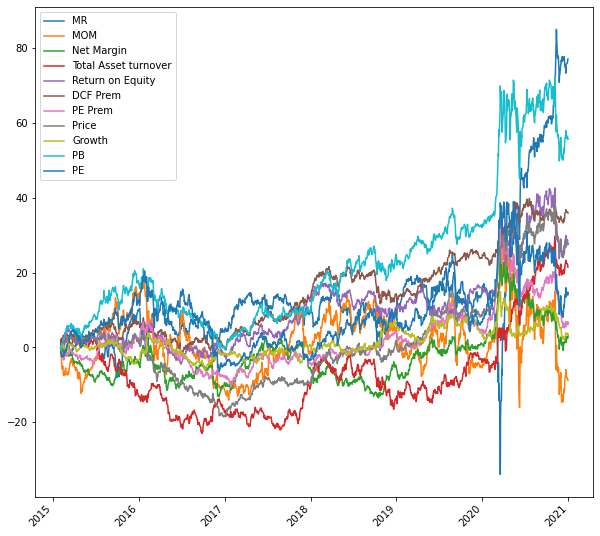

In [23]:
plt.figure(figsize=(10,10))
for f_ in f[11:]:
    factor_return2(f_)[0].cumsum().plot(label=f_)
plt.legend()
plt.xticks(rotation = 45)

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.,
        737791.]),
 <a list of 8 Text major ticklabel objects>)

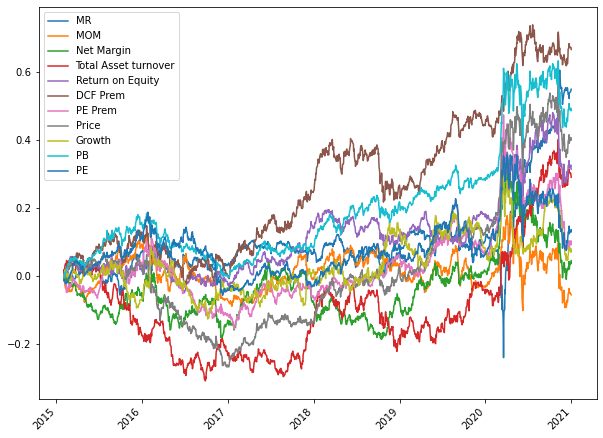

In [24]:
#Rescale to the same volitility
plt.figure(figsize=(10,8))
for f_ in f[11:]:
    ((factor_return2(f_)[0].cumsum())/factor_return2(f_)[2]*0.15).plot(label=f_)
plt.legend()
plt.xticks(rotation = 45)

### Maximize Sharpe Ratio by Adjusting Factor Weights 
Maximize Sharpe Ratio by Adjusting Factor Weights Based on Data from 02/02/2015-12/31/2018 and Apply Weights to 01/02/2019-12/31/2020    
The optimal Sharpe Ratio for 01/02/2019-12/31/2020 is 1.47

In [25]:
rtn=np.array([factor_return2("MR")[0].loc["2015-02-02":"2019-01-01"],factor_return2("MOM")[0].loc["2015-02-02":"2019-01-01"],
                    factor_return2("Net Margin")[0].loc["2015-02-02":"2018-12-31"],factor_return2("Total Asset turnover")[0].loc["2015-02-02":"2019-01-01"]
                     ,factor_return2("Return on Equity")[0].loc["2015-02-02":"2018-12-31"],factor_return2("DCF Prem")[0].loc["2015-02-02":"2019-01-01"],
                     factor_return2("PE Prem")[0].loc["2015-02-02":"2019-01-01"],factor_return2("Growth")[0].loc["2015-02-02":"2019-01-01"],factor_return2("Price")[0].loc["2015-02-02":"2019-01-01"],factor_return2("PE")[0].loc["2015-02-02":"2019-01-01"],factor_return2("PB")[0].loc["2015-02-02":"2019-01-01"]])
rtn.mean(axis=1)

array([ 0.00869126,  0.005598  , -0.00509529, -0.01391061,  0.01068226,
        0.01454895,  0.00427119,  0.00643154,  0.00186549,  0.01033254,
        0.02520608])

In [26]:
from scipy.optimize import minimize

In [27]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(rtn.mean(axis=1) * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(np.cov(rtn)*252,weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])
# minimize negative Sharpe Ratio
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * (-1)
# check allocation sums to 1
def check_sum(weights): 
    return np.sum(weights) - 1
# create constraint variable
cons = ({'type':'eq','fun':check_sum})
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
# initial guess
init_guess = [1/11.]*11


In [28]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP',
                       bounds=bounds, constraints=cons)
opt_results

     fun: -0.8368250360787091
     jac: array([-6.51121140e-04,  1.18248238e+00,  5.46588294e-01,  1.34295930e+00,
        4.03267086e-01, -2.45720148e-05,  4.03687418e-01, -3.19167972e-04,
        7.52333827e-01,  4.00790051e-01,  6.07974827e-04])
 message: 'Optimization terminated successfully'
    nfev: 99
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([7.35196522e-02, 8.46219796e-16, 4.08500397e-17, 1.54236977e-15,
       7.67089470e-16, 9.19659174e-02, 0.00000000e+00, 4.93147147e-01,
       4.27060876e-16, 4.48445118e-16, 3.41367284e-01])

In [29]:
#Optimized weights
opt_results.x

array([7.35196522e-02, 8.46219796e-16, 4.08500397e-17, 1.54236977e-15,
       7.67089470e-16, 9.19659174e-02, 0.00000000e+00, 4.93147147e-01,
       4.27060876e-16, 4.48445118e-16, 3.41367284e-01])

In [30]:
#In-Sample: Optimized return,volitility,Sharpe Ratio 
get_ret_vol_sr(opt_results.x)

array([3.46580949, 4.14161783, 0.83682504])

In [31]:
#out-Sample
rtn2=np.array([factor_return2("MR")[0].loc["2019-01-01":],factor_return2("MOM")[0].loc["2019-01-01":],
                    factor_return2("Net Margin")[0].loc["2019-01-01":],factor_return2("Total Asset turnover")[0].loc["2019-01-01":]
                     ,factor_return2("Return on Equity")[0].loc["2019-01-01":],factor_return2("DCF Prem")[0].loc["2019-01-01":],
                     factor_return2("PE Prem")[0].loc["2019-01-01":],factor_return2("Growth")[0].loc["2019-01-01":],factor_return2("Price")[0].loc["2019-01-01":],factor_return2("PE")[0].loc["2019-01-01":],factor_return2("PB")[0].loc["2019-01-01":]])
rtn_linear=np.sum(rtn2.mean(axis=1) * opt_results.x)
ret2 = np.sum(rtn2.mean(axis=1) * opt_results.x) * 252
vol2 = np.sqrt(np.dot(opt_results.x.T,np.dot(np.cov(rtn2)*252,opt_results.x)))
sr2 = ret2/vol2 
(ret2,vol2,sr2)

(8.056876013770745, 10.72038796572164, 0.7515470559025051)

In [32]:
rtn2.mean(axis=1)

array([ 0.13554968, -0.0283706 ,  0.01619195,  0.0695892 ,  0.03390952,
        0.04257802,  0.00498602, -0.00545249,  0.05129953,  0.00903519,
        0.06087085])

In [33]:
rtn_linear=rtn2.T@opt_results.x

## Machine Learning
The problem is turned into a binary classification to predict the sign of the excess return. The original dataset is seperated to a training set (02/02/2015-12/31/2018) and a test set (01/02/2019-12/31/2020). The logestic regression with threshold 0.5 gives a in-sample accuracy of 0.5086 and an out-of-sample accuracy of 0.5069

In [34]:
longdata=pd.read_csv('longdata.csv',index_col=[1,0])
longdata=longdata.sort_index()
longdata.loc["2015-02-02":"2018-12-31"].loc["2015-02-02":"2018-12-31"]

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2018-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2018-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2018-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                 Net Margin  Total Asset turnover  Return on Equity  DCF Prem  \
Dates      Symb                                                                 
2015-02-02 A       0.134744             -0.208028         -0.347873 -0.058286   
           AAL    -0.428377              0.380191          2.283966 -0.059618   
           AAP    -0.572432              0.696200          0.238881 -0.049277   
           AAPL    0.801074              0.108586          0.563021 -0.058588   
           ABC    -0.968581              4.809040         -0.507843 -0.057593   
...                     ...                   ...               ...       ...   
2018-12-31 XOM    -0.454882             -0.031549         -0.049209 -0.052448   
           XRAY   -3.043773             -0.672860         -0.073522 -0.052380   
           YUM     1.068999              0.221340         -0.075809 -0.052424   
           ZBH    -1.430772             -0.733924         -0.060840 -0.052064   
           ZBRA   -0.273627              0.051662         -0.027386 -0.050229   

                  PE Prem    Growth

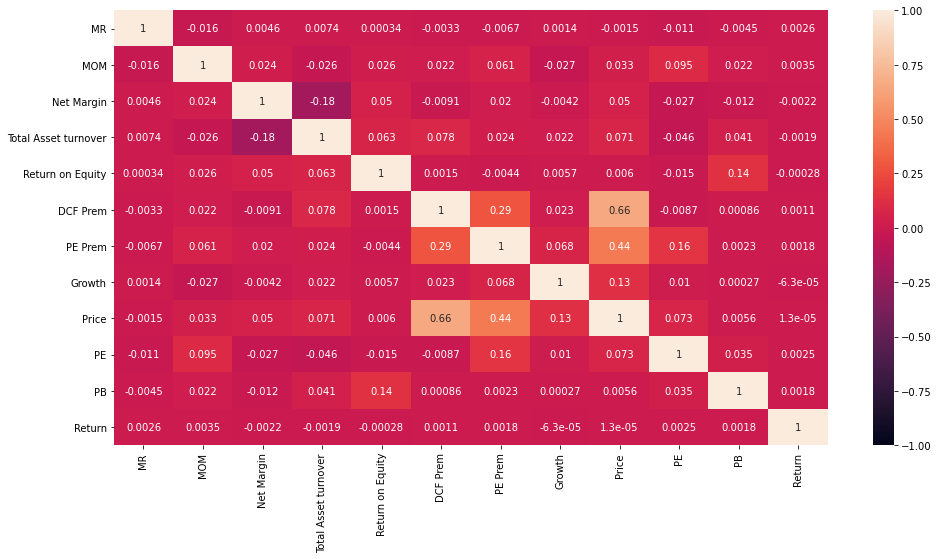

In [35]:
# All factors don't have high correlation, keep all
plt.figure(figsize=(16,8))
sns.heatmap(longdata.iloc[:402288,11:].corr(),vmin=-1, vmax=1,annot=True)

In [36]:
longdata["Excess Return"]=longdata["Return"]-longdata["Return"].groupby(level=0).median()

In [37]:
longdata["Excess Return"]=(longdata["Excess Return"]>0)*1+(longdata["Excess Return"]<0)*0
longdata

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2020-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2020-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2020-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                 Total Asset turnover  Return on Equity  DCF Prem   PE Prem  \
Dates      Symb                                                               
2015-02-02 A                -0.208028         -0.347873 -0.058286 -0.299186   
           AAL               0.380191          2.283966 -0.059618 -0.502251   
           AAP               0.696200          0.238881 -0.049277  0.687751   
           AAPL              0.108586          0.563021 -0.058588 -0.333656   
           ABC               4.809040         -0.507843 -0.057593 -3.725104   
...                               ...               ...       ...       ...   
2020-12-31 XOM              -0.424484         -0.072130 -0.051589  0.017214   
           XRAY             -0.284302         -0.067586 -0.051597 -0.026779   
           YUM              -0.311942         -0.071644 -0.051519  0.060282   
           ZBH              -0.278873         -0.067352 -0.051292 -0.036365   
           ZBRA             -0.227931         -0.055566 -0.043511  0.062676   

                   Growth     Price         PE        PB    R

In [38]:
#Classes are balance
#label 1 means positive excess return, label 0 means negative or 0 excess return
longdata["Excess Return"].sum(axis=0)/longdata["Excess Return"].shape[0]

0.4999556160492366

In [39]:
#longdata.dropna()
longdata.dropna(inplace=True)

In [40]:
X=longdata.iloc[:,:-2]
Y=longdata["Excess Return"]

In [41]:
Xtrain=X.loc["2015-02-02":"2018-12-31"]
Ytrain=Y.loc["2015-02-02":"2018-12-31"]
Xtest=X.loc["2019-01-01":]
Ytest=Y.loc["2019-01-01":]

In [42]:
Xtrain

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2018-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2018-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2018-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                      MOM  Net Margin  Total Asset turnover  Return on Equity  \
Dates      Symb                                                                 
2015-02-02 A    -1.236034    0.134744             -0.208028         -0.347873   
           AAL   1.979888   -0.428377              0.380191          2.283966   
           AAP   0.930309   -0.572432              0.696200          0.238881   
           AAPL  1.764043    0.801074              0.108586          0.563021   
           ABC   0.716376   -0.968581              4.809040         -0.507843   
...                   ...         ...                   ...               ...   
2018-12-31 XOM  -0.311411   -0.454882             -0.031549         -0.049209   
           XRAY -2.730451   -3.043773             -0.672860         -0.073522   
           YUM   0.379633    1.068999              0.221340         -0.075809   
           ZBH  -0.330681   -1.430772             -0.733924         -0.060840   
           ZBRA  2.455067   -0.273627              0.051662         -0.027386   

                 DCF Prem   PE Prem

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(max_iter=5000,class_weight="balanced").fit(Xtrain, Ytrain)
Ypred_prob_train=clf.predict_proba(Xtrain) #in-the-sample

The coefficients for logistic model is not consistent with the weights given by Linear Moedel but is consistent with correlation matrix.

In [45]:
longdata.iloc[:402288,11:].corr().iloc[:,-1].values[:-2]

array([ 0.00356102,  0.01185177,  0.00302639,  0.00081971, -0.00165746,
        0.0012213 ,  0.00391311, -0.00042026,  0.00069901,  0.00464191,
       -0.00096933])

In [46]:
coef=pd.DataFrame([Xtrain.columns.values,clf.coef_[0]]).T
coef.columns=["Factor","Logistic Coefficients"]
coef["Linear Weights"]=[0]*11+list(opt_results.x)
coef["Correlation"]=longdata.iloc[:402288,:].corr().iloc[:,-1].values[:-2]
coef

,Factor,Logistic Coefficients,Linear Weights,Correlation
0,Industrials,-0.0100572,0.000000e+00,-0.002858
1,Health Care,0.0112117,0.000000e+00,0.002168
2,Information Technology,0.0509338,0.000000e+00,0.010154
3,Communication Services,-0.0119013,0.000000e+00,-0.001949
4,Consumer Discretionary,-0.00842105,0.000000e+00,-0.001238
5,Utilities,0.0376619,0.000000e+00,0.003070
6,Financials,-0.00245841,0.000000e+00,-0.002753
7,Materials,-0.0329931,0.000000e+00,-0.004925
8,Real Estate,0.0533938,0.000000e+00,0.004985
9,Consumer Staples,-0.0173389,0.000000e+00,-0.002768


In [47]:
from sklearn.metrics import confusion_matrix
threshold=0.4996

Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)

Ypred_train.index=Ytrain.index

ActualNeg=sum(Ytrain==0)
ActualPos=sum(Ytrain==1)

TN=sum((Ytrain==0)&(Ypred_train==False))
FP=sum((Ytrain==0)&(Ypred_train==True))
TP=sum((Ytrain==1)&(Ypred_train==True))
FN=sum((Ytrain==1)&(Ypred_train==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
        0      1
0  108540  92627
1  104898  96223
Accuracy: 0.5089960426361214


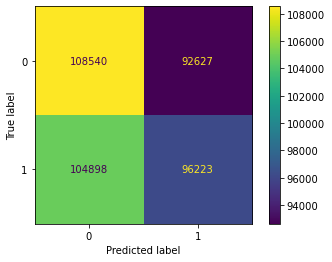

In [48]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Ytrain, Ypred_train)).plot(values_format = '')

In [49]:
TP+FP,FN+TN

(188850, 213438)

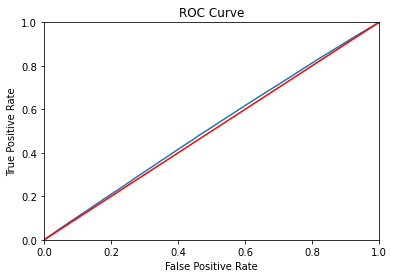

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(list(Ytrain), list(Ypred_prob_train[:,1]))
import matplotlib.pyplot as plt

lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [51]:
np.linspace(0.44,0.56,130)

array([0.44      , 0.44093023, 0.44186047, 0.4427907 , 0.44372093,
       0.44465116, 0.4455814 , 0.44651163, 0.44744186, 0.44837209,
       0.44930233, 0.45023256, 0.45116279, 0.45209302, 0.45302326,
       0.45395349, 0.45488372, 0.45581395, 0.45674419, 0.45767442,
       0.45860465, 0.45953488, 0.46046512, 0.46139535, 0.46232558,
       0.46325581, 0.46418605, 0.46511628, 0.46604651, 0.46697674,
       0.46790698, 0.46883721, 0.46976744, 0.47069767, 0.47162791,
       0.47255814, 0.47348837, 0.4744186 , 0.47534884, 0.47627907,
       0.4772093 , 0.47813953, 0.47906977, 0.48      , 0.48093023,
       0.48186047, 0.4827907 , 0.48372093, 0.48465116, 0.4855814 ,
       0.48651163, 0.48744186, 0.48837209, 0.48930233, 0.49023256,
       0.49116279, 0.49209302, 0.49302326, 0.49395349, 0.49488372,
       0.49581395, 0.49674419, 0.49767442, 0.49860465, 0.49953488,
       0.50046512, 0.50139535, 0.50232558, 0.50325581, 0.50418605,
       0.50511628, 0.50604651, 0.50697674, 0.50790698, 0.50883

In [52]:
np.median(Ypred_prob_train[:,1])

0.49962925571913847

In [53]:
((Ypred_prob_train[:,1]<0.4996)*1).sum(),len(Ypred_prob_train[:,1])-((Ypred_prob_train[:,1]<0.4996)*1).sum()

(200670, 201618)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00,
        5.0000e+00, 1.1000e+01, 7.0000e+00, 1.1000e+01, 1.6000e+01,
        1.6000e+01, 2.4000e+01, 2.0000e+01, 2.4000e+01, 3.5000e+01,
        3.7000e+01, 4.8000e+01, 6.7000e+01, 9.5000e+01, 8.8000e+01,
        1.1700e+02, 1.6600e+02, 1.9200e+02, 2.2400e+02, 2.8700e+02,
        3.6100e+02, 4.5900e+02, 5.2200e+02, 6.5000e+02, 7.9700e+02,
        8.5300e+02, 1.0660e+03, 1.1200e+03, 1.3010e+03, 1.3770e+03,
        1.4590e+03, 1.4470e+03, 1.4310e+03, 1.3700e+03, 1.5070e+03,
        1.6560e+03, 1.9530e+03, 2.2360e+03, 2.7290e+03, 3.5470e+03,
        4.5380e+03, 5.5820e+03, 6.7630e+03, 8.2020e+03, 9.5990e+03,
        1.0852e+04, 1.2306e+04, 1.3820e+04, 1.5246e+04, 1.6717e+04,
        1.7476e+04, 1.7086e+04, 1.6668e+04, 1.5473e+04, 1.4778e+04,
        1.3781e+04, 1.3286e+04, 1.3007e+04, 1.2699e+04, 1.2301e+04,
        1.1998e+04, 1.1505e+04, 1.1001e+04, 1.07

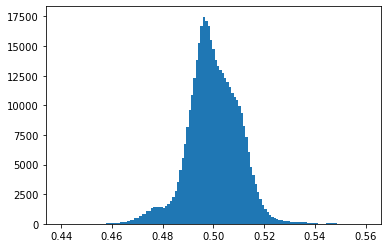

In [54]:
#From the histogram, we can tell that the predictions concentrate around 0.5, 
#which suggest the explanatory power is low. 
plt.figure()
plt.hist(Ypred_prob_train[:,1],bins=np.linspace(0.44,0.56,130))

In [55]:
# def quant_pos(x,p,q):
#     #x is an array
#     #p is higher
#     #q is lower
#     y=x.copy()
#     p=np.quantile(y,p)
#     q=np.quantile(y,q)
#     for i in range(len(y)):
#         if y[i]>p:
#             y[i]=1
#         elif y[i]<=q:
#             y[i]=-1
#         else:
#             y[i]=0
#     return(y)

## In Sample Sharpe Ratio

In [56]:
position

,MMM,ABT,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WU,WY,WHR,WMB,WYNN,XEL,XLNX,YUM,ZBRA,ZBH
2015-02-02,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-03,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-04,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-05,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
2015-02-06,1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-28,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-29,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1
2020-12-30,1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,1,1


In [57]:
position=Ypred_train*(1)
position=position*(408-position.groupby(level=0).sum())/position.groupby(level=0).sum()
position.loc[position==0]=position.loc[position==0]-1
rtn_ml=(position*longdata["Return"].loc[:"2019-01-01"]).groupby(level=0).sum()
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(10.716866783210994, 14.804667137482568, 0.7238843456384069)

In [58]:
position

Dates       Symb
2015-02-02  A      -1.000000
            AAL     1.060606
            AAP     1.060606
            AAPL    1.060606
            ABC     1.060606
                      ...   
2018-12-31  XOM    -1.000000
            XRAY   -1.000000
            YUM    -1.000000
            ZBH    -1.000000
            ZBRA    1.125000
Length: 402288, dtype: float64

In [59]:
position.groupby(level=0).sum()

Dates
2015-02-02   -1.065814e-14
2015-02-03    1.776357e-15
2015-02-04   -2.398082e-14
2015-02-05   -1.776357e-15
2015-02-06   -3.019807e-14
                  ...     
2018-12-24    4.973799e-14
2018-12-26    3.086420e-14
2018-12-27   -8.881784e-14
2018-12-28    4.440892e-14
2018-12-31    0.000000e+00
Length: 986, dtype: float64

### Out-of-Sample

In [60]:
Ypred_prob=clf.predict_proba(Xtest) #out-of-sample
threshold=0.4996

Ypred=pd.Series(Ypred_prob[:,0]<threshold)

Ypred.index=Ytest.index

ActualNeg=sum(Ytest==0)
ActualPos=sum(Ytest==1)

TN=sum((Ytest==0)&(Ypred==False))
FP=sum((Ytest==0)&(Ypred==True))
TP=sum((Ytest==1)&(Ypred==True))
FN=sum((Ytest==1)&(Ypred==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
       0      1
0  54370  48654
1  53068  49948
Accuracy: 0.506299747621821


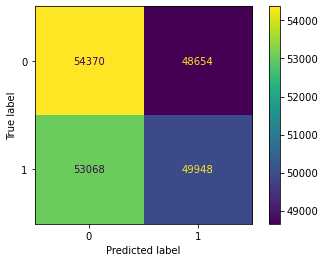

In [61]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Ytest, Ypred)).plot(values_format = '')

#### Out of Sample Sharpe Ratio
Based on a prediction accuracy of 0.507, the sharpe ratio is 0.45

In [62]:
position=Ypred*(1)
position=position*(408-position.groupby(level=0).sum())/position.groupby(level=0).sum()
position.loc[position==0]=position.loc[position==0]-1
position

Dates       Symb
2019-01-02  A      -1.000000
            AAL    -1.000000
            AAP     1.081633
            AAPL    1.081633
            ABC     1.081633
                      ...   
2020-12-31  XOM    -1.000000
            XRAY   -1.000000
            YUM    -1.000000
            ZBH    -1.000000
            ZBRA    1.103093
Length: 206040, dtype: float64

In [63]:
#Almost market neutral
position.groupby(level=0).mean()

Dates
2019-01-02   -2.242215e-16
2019-01-03   -2.590520e-16
2019-01-04   -2.329291e-16
2019-01-07   -2.329291e-16
2019-01-08    3.134747e-16
                  ...     
2020-12-24   -4.136125e-17
2020-12-28   -7.074951e-17
2020-12-29   -4.136125e-17
2020-12-30   -1.023147e-16
2020-12-31   -7.836868e-17
Length: 505, dtype: float64

In [64]:
rtn_ml=(position*longdata["Return"].loc["2019-01-01":]).groupby(level=0).sum()
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(3.7993827745895437, 26.834252269717755, 0.14158705584195158)

In [65]:
rtn_logistic=rtn_ml
rtn_logistic

Dates
2019-01-02   -3.328064
2019-01-03   -0.037896
2019-01-04   -1.511972
2019-01-07   -0.163811
2019-01-08    0.333776
                ...   
2020-12-24    0.826434
2020-12-28    0.122926
2020-12-29    0.102282
2020-12-30   -0.693896
2020-12-31    0.698585
Length: 505, dtype: float64

In [66]:
rtn_linear=pd.Series(rtn_linear,index=rtn_logistic.index)
rtn_dt=pd.read_csv("rtn_ml.csv", index_col="Dates")
rtn_dt=rtn_dt["0"]

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

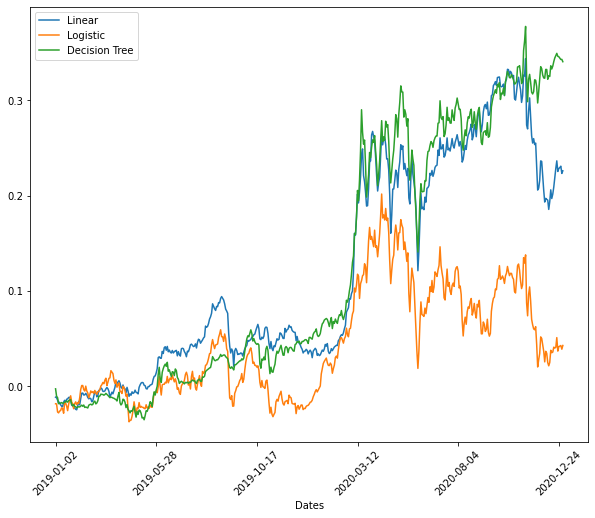

In [67]:
#Rescale to the same volitility
plt.figure(figsize=(10,8))
((rtn_linear.cumsum())/(rtn_linear.std()* 252**0.5)*0.15).plot(label="Linear")
((rtn_logistic.cumsum()/(rtn_logistic.std()* 252**0.5)*0.15)).plot(label="Logistic")
((rtn_dt.cumsum()/(rtn_dt.std()* 252**0.5)*0.15)).plot(label="Decision Tree")
#((factor_return2(f_)[0].cumsum())/factor_return2(f_)[2]*0.15).plot(label=f_)
plt.legend()
plt.xticks(rotation = 45)

### Other Transforms
1. Quantile Transform
2. Factor Position Transform

In [68]:
# quantile = QuantileTransformer(n_quantiles=len(X.columns))
# values_transformed = quantile.fit_transform(X.values.transpose()).transpose()
# values_transformed

In [69]:
#factor position transform
longdata2=pd.read_csv("longdata2.csv",index_col=[0,1])
longdata2

MR  MOM  Net Margin  Total Asset turnover  \
2015-02-02 00:00:00 A      1    0           1                     1   
                    AAL    1    1           0                     1   
                    AAP    0    1           0                     1   
                    AAPL   0    1           1                     1   
                    ABC    0    1           0                     1   
...                       ..  ...         ...                   ...   
2020-12-31 00:00:00 XOM    1    0           0                     0   
                    XRAY   1    0           0                     1   
                    YUM    0    0           1                     0   
                    ZBH    0    0           0                     1   
                    ZBRA   0    1           1                     1   

                          Return on Equity  DCF Prem  PE Prem  Growth  Price  \
2015-02-02 00:00:00 A                    0         1        0       0      0   
                    AAL                  1         0        0       1      0   
                    AAP                  1         1        1       1      1   
                    AAPL                 1         0        0       0      0   
                    ABC                  0         1        0       1      1   
...                                    ...       ...      ...     ...    ...   
2020-12-31 00:00:00 XOM                  0         0        0       1      0   
                    XRAY                 0         0        0       0      0   
                    YUM                  0         1        1       1      1   
                    ZBH                  0         1        0       0      1   
                    ZBRA                 1         1        1       0      1   

                          PE  PB  Excess Return  
2015-02-02 00:00:00 A      1   0              1  
                    AAL    0   1              0  
                    AAP    1   1              0  
                    AAPL   0   1              1  
                    ABC    1   1              0  
...                       ..  ..            ...  
2020-12-31 00:00:00 XOM    0   0              0  
                    XRAY   0   0              1  
                    YUM    1   0              0  
                    ZBH    0   0              1  
                    ZBRA   1   1              0  

[608328 rows x 12 columns]

In [70]:
XX=longdata2.iloc[:,:-1]
XX

MR  MOM  Net Margin  Total Asset turnover  \
2015-02-02 00:00:00 A      1    0           1                     1   
                    AAL    1    1           0                     1   
                    AAP    0    1           0                     1   
                    AAPL   0    1           1                     1   
                    ABC    0    1           0                     1   
...                       ..  ...         ...                   ...   
2020-12-31 00:00:00 XOM    1    0           0                     0   
                    XRAY   1    0           0                     1   
                    YUM    0    0           1                     0   
                    ZBH    0    0           0                     1   
                    ZBRA   0    1           1                     1   

                          Return on Equity  DCF Prem  PE Prem  Growth  Price  \
2015-02-02 00:00:00 A                    0         1        0       0      0   
                    AAL                  1         0        0       1      0   
                    AAP                  1         1        1       1      1   
                    AAPL                 1         0        0       0      0   
                    ABC                  0         1        0       1      1   
...                                    ...       ...      ...     ...    ...   
2020-12-31 00:00:00 XOM                  0         0        0       1      0   
                    XRAY                 0         0        0       0      0   
                    YUM                  0         1        1       1      1   
                    ZBH                  0         1        0       0      1   
                    ZBRA                 1         1        1       0      1   

                          PE  PB  
2015-02-02 00:00:00 A      1   0  
                    AAL    0   1  
                    AAP    1   1  
                    AAPL   0   1  
                    ABC    1   1  
...                       ..  ..  
2020-12-31 00:00:00 XOM    0   0  
                    XRAY   0   0  
                    YUM    1   0  
                    ZBH    0   0  
                    ZBRA   1   1  

[608328 rows x 11 columns]

In [71]:
# Xq=pd.read_csv("Xq_noind.csv",index_col=[0,1])
# Xq

In [72]:
Xtrain=XX.loc["2015-02-02":"2019-01-01"]
Ytrain=Y.loc["2015-02-02":"2019-01-01"]
Xtest=XX.loc["2019-01-01":]
Ytest=Y.loc["2019-01-01":]

In [73]:
Xtrain

MR  MOM  Net Margin  Total Asset turnover  \
2015-02-02 00:00:00 A      1    0           1                     1   
                    AAL    1    1           0                     1   
                    AAP    0    1           0                     1   
                    AAPL   0    1           1                     1   
                    ABC    0    1           0                     1   
...                       ..  ...         ...                   ...   
2018-12-31 00:00:00 XOM    1    0           0                     1   
                    XRAY   0    0           0                     0   
                    YUM    0    1           1                     1   
                    ZBH    0    0           0                     0   
                    ZBRA   0    1           0                     1   

                          Return on Equity  DCF Prem  PE Prem  Growth  Price  \
2015-02-02 00:00:00 A                    0         1        0       0      0   
                    AAL                  1         0        0       1      0   
                    AAP                  1         1        1       1      1   
                    AAPL                 1         0        0       0      0   
                    ABC                  0         1        0       1      1   
...                                    ...       ...      ...     ...    ...   
2018-12-31 00:00:00 XOM                  0         0        1       1      0   
                    XRAY                 0         0        0       0      0   
                    YUM                  0         0        1       1      0   
                    ZBH                  0         1        0       0      1   
                    ZBRA                 1         1        1       0      1   

                          PE  PB  
2015-02-02 00:00:00 A      1   0  
                    AAL    0   1  
                    AAP    1   1  
                    AAPL   0   1  
                    ABC    1   1  
...                       ..  ..  
2018-12-31 00:00:00 XOM    0   0  
                    XRAY   0   0  
                    YUM    1   0  
                    ZBH    0   0  
                    ZBRA   1   1  

[402288 rows x 11 columns]

In [74]:
Ytrain

Dates       Symb
2015-02-02  A       1
            AAL     0
            AAP     0
            AAPL    1
            ABC     0
                   ..
2018-12-31  XOM     0
            XRAY    0
            YUM     0
            ZBH     1
            ZBRA    1
Name: Excess Return, Length: 402288, dtype: int64

In [75]:
clf = LogisticRegression(max_iter=5000,class_weight="balanced").fit(Xtrain, Ytrain)
Ypred_prob_train=clf.predict_proba(Xtrain) #in-the-sample

In [76]:
#The Coefficients matches Correlation, which tells us the model is performing correctly
coef=pd.DataFrame([Xtrain.columns.values,clf.coef_[0]]).T
coef.columns=["Factors","Logistic Coefficients"]

coef["Correlation"]=longdata2.corr().iloc[:,-1].values[:-1]
coef

,Factors,Logistic Coefficients,Correlation
0,MR,0.009728,0.005592
1,MOM,0.0378842,0.010991
2,Net Margin,0.00837496,0.004665
3,Total Asset turnover,-0.0132144,0.001759
4,Return on Equity,-0.00507554,0.004379
5,DCF Prem,0.0294624,0.007657
6,PE Prem,0.0122878,0.004955
7,Growth,0.0051601,0.001535
8,Price,-0.0204934,0.004258
9,PE,0.00678768,0.009432


In [77]:
threshold=.4997

Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)

Ypred_train.index=Ytrain.index

ActualNeg=sum(Ytrain==0)
ActualPos=sum(Ytrain==1)

TN=sum((Ytrain==0)&(Ypred_train==False))
FP=sum((Ytrain==0)&(Ypred_train==True))
TP=sum((Ytrain==1)&(Ypred_train==True))
FN=sum((Ytrain==1)&(Ypred_train==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
        0      1
0  105759  95408
1  103096  98025
Accuracy: 0.5065624627132801


In [78]:
#in-sample
position=Ypred_train*((FN+TN)/(FP+TP))
position.loc[position==0]=position.loc[position==0]-1
rtn_ml=(position*longdata["Return"].loc[:"2019-01-01"]).groupby(level=0).sum()
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(6.159421187729824, 13.420559514123855, 0.458954127899632)